# Some preprocessing to implement tanh in generator

In [1]:
from google.colab import drive
#drive.mount('/content/gdrive', force_remount=True)
drive.mount('/content/gdrive')
!ls
%cd gdrive/My\ Drive/GANs_for_Tabular_data-master/cWGAN_GP/
!ls

Mounted at /content/gdrive
gdrive	sample_data
/content/gdrive/My Drive/GANs_for_Tabular_data-master/cWGAN_GP
 cWGAN_GP.ipynb			'lung cancer-name.csv'
 cWGAN_GP-lung2.ipynb		'pancreatic2020 data.csv'
 cWGAN_GP-lung.ipynb		'Parkinsson disease.csv'
 cWGAN_GP-pancreatic.ipynb	 Prostate_Cancer.csv
 cWGAN_GP-parkinson.ipynb	'survey lung cancer.csv'
 cWGAN_GP-prostateCancer.ipynb	 train.csv
'lung cancer2.csv'


In [2]:
#!pip list
#!pip install lightgbm==3.3.4 --upgrade 
#!pip install xgboost --upgrade
!pip install xgboost==1.6.2 --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 5.7 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [3]:
import pandas as pd
import numpy as np

from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt


# normalized_df=(df-df.mean())/df.std()
# df = pd.read_csv('lung cancer-name.csv')
# df.info()


Add data preprocessing

In [4]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, cross_validate

'''Load the data'''
df_all = pd.read_csv('survey lung cancer.csv')
df_all.info()
df_all.value_counts(df_all['LUNG_CANCER'])

df_all["LUNG_CANCER"] = df_all.LUNG_CANCER.map({"YES": 1, "NO": 0})
cols = df_all.columns
df = pd.get_dummies(df_all[cols])



# #df_NoScaled = df[['AGE']]
# #df.drop(['AGE'],axis=1,inplace=True)
# #leon
# df_target= df["LUNG_CANCER"]

# df.drop(['LUNG_CANCER'],axis=1,inplace=True)

# #####
# df.info()
# df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [5]:
# sc = MinMaxScaler(feature_range=(0, 1))
# #sc = StandardScaler()
# #df_scaled = sc.fit_transform(df)
# standard_scaler = sc.fit(df)
# df_scaled = standard_scaler.transform(df)


# #df_scaled.head(2)
# df2 = pd.DataFrame(df_scaled)
# print(df2.head())
# #df3 = df2[cols]
# df_target.head()

# print(df.columns)

In [6]:
# #X_train, X_test, y_train, y_test = train_test_split(model_df, df_lung_cancer, test_size=0.20, shuffle=True)
# X_train, X_test, y_train, y_test = train_test_split(df2, df_target, test_size=0.20, shuffle=True)
# print(f"X_train shape: {X_train.shape}")
# print(f"X_test shape: {X_test.shape}")
# print(f"y_train shape: {y_train.shape}")
# print(f"y_test shape: {y_test.shape}")
# print(f"Number of classes {len(np.unique(y_train))}")
# #print(X_test.shape)
# #print(y_test.shape)
# #print(pd.DataFrame(y_test).value_counts())
# #print(X_train.value_counts())
# print(y_train.value_counts())

# Importing the dependencies

In [7]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import precision_score, recall_score, f1_score,\
                            accuracy_score, balanced_accuracy_score,classification_report,\
                            plot_confusion_matrix, confusion_matrix

# Creating pytorch dataset and dataloader

In [8]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [9]:
#df = pd.read_csv('lung cancer-name.csv')
#df.info()

#x = df.iloc[:, 0:7].values
#y = df.iloc[:, -1].values

y = df["LUNG_CANCER"]
x = df.drop(["LUNG_CANCER"], axis=1)
print(x.head())
print(y.head())

mc = MinMaxScaler(feature_range=(0, 1))
standard_scaler = mc.fit(x)
x_scaled = standard_scaler.transform(x)
x_scaled = pd.DataFrame(x_scaled)

print(x_scaled.head())
print(f"y value_count:\n {y.value_counts()}")
#x_scaled = x_scaled.values
#y = y.values

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, shuffle=True)   # 8:2

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"Number of classes {len(np.unique(y_train))}")




   AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  CHRONIC DISEASE  \
0   69        1               2        2              1                1   
1   74        2               1        1              1                2   
2   59        1               1        1              2                1   
3   63        2               2        2              1                1   
4   63        1               2        1              1                1   

   FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0         2         1         2                  2         2   
1         2         2         1                  1         1   
2         2         1         2                  1         2   
3         1         1         1                  2         1   
4         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  GENDER_F  GENDER_M  
0                    2                      2           2         0         1 

In [10]:
#leon
"""
import xgboost as xgb
xgb = xgb.XGBClassifier()
xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)

print(classification_report(y_test, y_pred))
plot_confusion_matrix(xgb, X_test, y_test)
plt.show()
"""

'\nimport xgboost as xgb\nxgb = xgb.XGBClassifier()\nxgb.fit(X_train,y_train)\n\ny_pred = xgb.predict(X_test)\n\nprint(classification_report(y_test, y_pred))\nplot_confusion_matrix(xgb, X_test, y_test)\nplt.show()\n'

In [11]:
import xgboost as xgb
parameter = {
    'max_depth':range(3,10,2), 
    'min_child_weight':range(1,5,2)
    }

p_grid_search = GridSearchCV(estimator = xgb.XGBClassifier(eval_metric='mlogloss'), param_grid = parameter, 
                             scoring='accuracy', n_jobs=-1, cv=2)

p_grid_search.fit(X_train, y_train)


GridSearchCV(cv=2,
             estimator=xgb.XGBClassifier(base_score=None, booster=None,   #leon  add xgb before xgbclassifier
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=None, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 5, 2)},
             scoring='accuracy')

p_grid_search.best_params_, p_grid_search.best_score_

({'max_depth': 3, 'min_child_weight': 3}, 0.8866706005769736)

In [12]:
refined_xgb_model = xgb.XGBClassifier(eval_metric='logloss', max_depth=list(p_grid_search.best_params_.values())[0]-1, 
                                      min_child_weight=list(p_grid_search.best_params_.values())[-1]+4)
refined_xgb_model.fit(X_train, y_train)
#print(f'Accuracy of XGB classifier on training set: {refined_xgb_model.score(X_train, y_train)}')
#print(f'Accuracy of XGB classifier on test set: {refined_xgb_model.score(X_test[X_train.columns], y_test)}')

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=2,
              max_leaves=0, min_child_weight=7, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

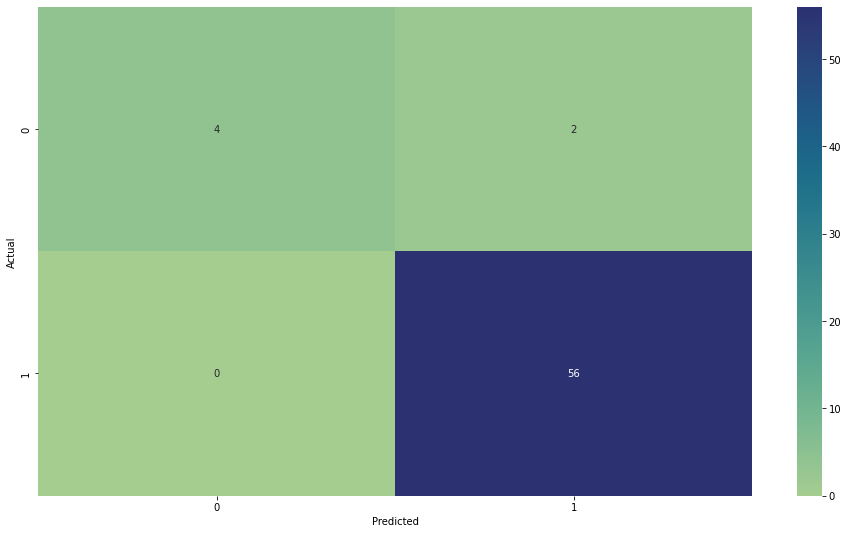

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.97      1.00      0.98        56

    accuracy                           0.97        62
   macro avg       0.98      0.83      0.89        62
weighted avg       0.97      0.97      0.96        62

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.67      1.00      0.80      0.82      0.64         6
          1       0.97      1.00      0.67      0.98      0.82      0.69        56

avg / total       0.97      0.97      0.70      0.96      0.82      0.68        62



In [13]:
from imblearn.metrics import classification_report_imbalanced
ref_xgb_pred_y = refined_xgb_model.predict(X_test)
def plot_confusion_matrix(y_test, y_pred, color):
    
    plt.rcParams['figure.figsize'] = (16, 9)
   
    data = {'y_Actual': y_test, 'y_Predicted': y_pred}

    df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
    conf_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], 
                              rownames=['Actual'], 
                              colnames=['Predicted'])
    
    sns.heatmap(conf_matrix, annot=True, fmt = "d", cmap=color)
    plt.show()
    
plot_confusion_matrix(np.array(y_test), ref_xgb_pred_y, 'crest')
print(classification_report(y_test, ref_xgb_pred_y))
print(classification_report_imbalanced(y_test, ref_xgb_pred_y))  #, digits=4

In [14]:
"""
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300, n_jobs=-1)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))
plot_confusion_matrix(rf, X_test, y_test)
plt.show()
"""

'\nfrom sklearn.ensemble import RandomForestClassifier\nrf = RandomForestClassifier(n_estimators=300, n_jobs=-1)\nrf.fit(X_train,y_train)\ny_pred = rf.predict(X_test)\n\nprint(classification_report(y_test, y_pred))\nplot_confusion_matrix(rf, X_test, y_test)\nplt.show()\n'

Training confusion matrix
[[ 33   0]
 [  2 212]]
Testing confusion matrix
[[ 3  3]
 [ 2 54]]
0.9919028340080972
0.9193548387096774
Train set:247
Train Accuracy=99.19028340080972%
Test set:62
Test Accuracy=91.93548387096774%
              precision    recall  f1-score   support

           0       0.60      0.50      0.55         6
           1       0.95      0.96      0.96        56

    accuracy                           0.92        62
   macro avg       0.77      0.73      0.75        62
weighted avg       0.91      0.92      0.92        62

                   pre       rec       spe        f1       geo       iba       sup

          0       0.60      0.50      0.96      0.55      0.69      0.46         6
          1       0.95      0.96      0.50      0.96      0.69      0.50        56

avg / total       0.91      0.92      0.54      0.92      0.69      0.50        62



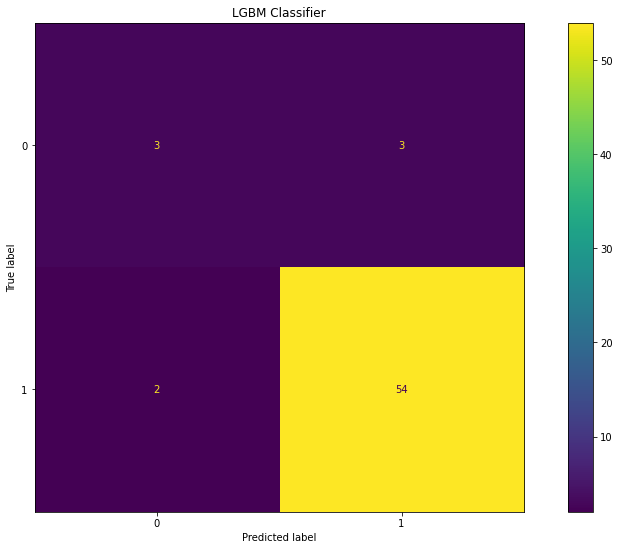

In [15]:
import lightgbm as lgb
lgb_model= lgb.LGBMClassifier()
lgb_model.fit(X_train,y_train)

#from sklearn.metrics import accuracy_score, confusion_matrix
predictions= lgb_model.predict(X_train)
percentage=lgb_model.score(X_train,y_train)
res=confusion_matrix(y_train,predictions)
print("Training confusion matrix")
print(res)
predictions= lgb_model.predict(X_test)
train_percentage=lgb_model.score(X_train,y_train)
test_percentage=lgb_model.score(X_test,y_test)
res = confusion_matrix(y_test,predictions)
print("Testing confusion matrix")
print(res)

# check the accuracy on the training set
print(lgb_model.score(X_train, y_train))
print(lgb_model.score(X_test, y_test))
print(f"Train set:{len(X_train)}")
print(f"Train Accuracy={train_percentage*100}%")
print(f"Test set:{len(X_test)}")
print(f"Test Accuracy={test_percentage*100}%")

print(classification_report(y_test, predictions))
print(classification_report_imbalanced(y_test, predictions)) 
"""
plot_confusion_matrix(lgb_model, X_test, y_test)
plt.show()
"""
cm = confusion_matrix(y_test, predictions, labels=lgb_model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgb_model.classes_)
disp.plot()
_ = disp.ax_.set_title("LGBM Classifier")
plt.show()

              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.95      0.98      0.96        56

    accuracy                           0.94        62
   macro avg       0.85      0.74      0.78        62
weighted avg       0.93      0.94      0.93        62

                   pre       rec       spe        f1       geo       iba       sup

          0       0.75      0.50      0.98      0.60      0.70      0.47         6
          1       0.95      0.98      0.50      0.96      0.70      0.51        56

avg / total       0.93      0.94      0.55      0.93      0.70      0.51        62



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


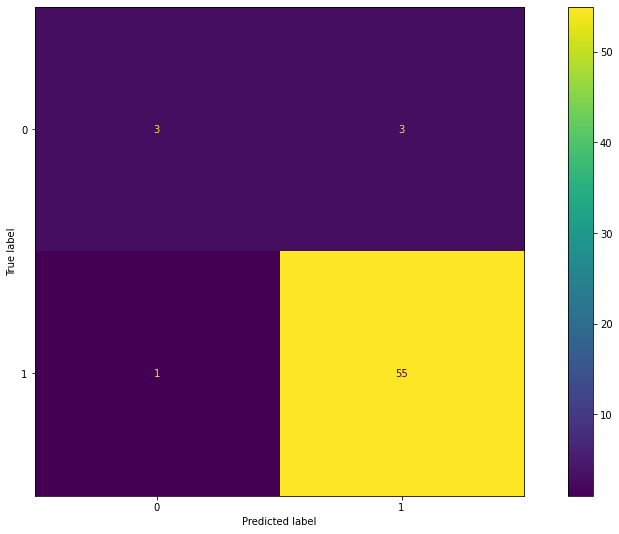

In [52]:
import xgboost as xgb
from sklearn.metrics import classification_report,\
                            plot_confusion_matrix, confusion_matrix
xgb=xgb.XGBClassifier()

xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)
#from sklearn.preprocessing import LabelEncoder
#change y value to 0..2
#le2 = LabelEncoder()
#y_test = le2.fit_transform(y_test)

print(classification_report(y_test, y_pred))
print(classification_report_imbalanced(y_test, y_pred))
plot_confusion_matrix(xgb, X_test, y_test)
plt.show()

In [17]:
class MyDataset(Dataset):
 
  def __init__(self ,x, y):
    """
    df = pd.read_csv('train.csv')
    df["label"] = df.Survived
#     df = df[df['label'] == 1].reset_index(drop = True)
    df = df.drop(["PassengerId", "Survived", "Name", "Ticket", "Cabin"], axis=1)
    median_age = df.Age.median()
    mode_embarked = df.Embarked.mode()[0]
    df = df.fillna({"Age": median_age, "Embarked": mode_embarked})
    df.Sex = df.Sex.replace({'male':0,'female':1})
    df.Embarked = df.Embarked.replace({'S':0,'C':1,'Q':2})
    """
    
    
    """
    mc = MinMaxScaler(feature_range=(0, 1))
    standard_scaler = mc.fit(x)
    x_scaled = standard_scaler.transform(x)

    x_scaled = pd.DataFrame(x_scaled)
    print(x_scaled.head())
    print(f"y value_count:\n {y.value_counts()}")
    x_scaled = x_scaled.values
    y = y.values
    """
    x = x.values
    y = y.values

    #X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.20, shuffle=True)
    
    #x = x.values
    #y = y.values
    #X_train = X_train.values
    #y_train = y_train.values
    #self.x_train=torch.tensor(x_scaled,dtype=torch.float32)
    self.x_train=torch.tensor(x,dtype=torch.float32)
    self.y_train=torch.tensor(y,dtype=torch.int)

    print(self.x_train[0:5])
    print(self.y_train[0:5])

  def __len__(self):
    return len(self.y_train)
   
  def __getitem__(self,idx):
    return self.x_train[idx],self.y_train[idx]

train_ds = MyDataset(X_train, y_train)

tensor([[0.8636, 1.0000, 1.0000, 1.0000, 1.0000, 0.0000, 1.0000, 0.0000, 1.0000,
         0.0000, 1.0000, 1.0000, 1.0000, 0.0000, 1.0000, 0.0000],
        [0.8485, 0.0000, 1.0000, 0.0000, 1.0000, 0.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000],
        [0.5303, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 0.0000, 1.0000, 0.0000, 1.0000],
        [0.5152, 1.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000],
        [0.5758, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 1.0000, 0.0000, 1.0000,
         0.0000, 1.0000, 1.0000, 0.0000, 1.0000, 1.0000, 0.0000]])
tensor([1, 1, 1, 0, 0], dtype=torch.int32)


In [18]:
#train_ds.info()

In [19]:
batch_size = 32


train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=0, pin_memory=True)

In [20]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

device = get_default_device()
device

device(type='cuda')

In [21]:
train_dl = DeviceDataLoader(train_dl, device)

In [22]:
train_dl.device

device(type='cuda')

# Creating generator and discriminator models

<b> Generator Architecture

In [23]:
latent_size = 16 # origin is 7
n_features = 16  # equal to columns
num_classes = 2
embed_size = 2  # classes number?

In [24]:
class Generator(nn.Module):
    def __init__(self, embed_size = 2):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(n_features + embed_size, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            #nn.Linear(32, 7),
            nn.Linear(32, 16)   # the last number is equal to columns
            
#             nn.Linear(latent_size, 1024),
#             nn.ReLU(),
#             nn.Linear(1024, 512),
#             nn.ReLU(inplace = True),
#             nn.Dropout2d(0.2),
            
#             nn.Linear(512, 256),
#             nn.ReLU(inplace = True),
#             nn.Dropout2d(0.2),
            
#             nn.Linear(256, 128),
#             nn.ReLU(inplace = True),
#             nn.Dropout2d(0.2),
            
#             nn.Linear(128, 64),
#             nn.ReLU(inplace = True),
#             nn.Dropout2d(0.2),
            
#             nn.Linear(64, 32),
#             nn.ReLU(inplace = True),
#             nn.Dropout2d(0.2),
            
#             nn.Linear(32, 16),
#             nn.ReLU(inplace = True),
#             nn.Dropout2d(0.2),
            
#             nn.Linear(16, 7),
        )
        self.embed = nn.Embedding(num_classes, embed_size)

    def forward(self, x, labels):
        embed = self.embed(labels)#.reshape(labels.shape[0], 1)
        x = torch.cat([x, embed], dim = 1)
        output = self.model(x)
        return output
    

generator = to_device(Generator(), device)

<b> Discriminator Architecture

In [25]:
class Discriminator(nn.Module):
    def __init__(self, embed_size = 2):
        super().__init__()
        
        self.model = nn.Sequential(
            nn.Linear(n_features + embed_size, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
#             nn.Linear(n_features, 1024),
#             nn.ReLU(),
#             nn.Linear(1024, 512),
#             nn.ReLU(inplace = True),
#             nn.Dropout2d(0.2),
            
#             nn.Linear(512, 256),
#             nn.ReLU(inplace = True),
#             nn.Dropout2d(0.2),
            
#             nn.Linear(256, 128),
#             nn.ReLU(inplace = True),
#             nn.Dropout2d(0.2),
            
#             nn.Linear(128, 64),
#             nn.ReLU(inplace = True),
#             nn.Dropout2d(0.2),
            
#             nn.Linear(64, 32),
#             nn.ReLU(inplace = True),
#             nn.Dropout2d(0.2),
            
#             nn.Linear(32, 16),
#             nn.ReLU(inplace = True),
#             nn.Dropout2d(0.2),
            
#             nn.Linear(16, 1),
#             nn.Sigmoid()
        )
        
        self.embed = nn.Embedding(num_classes, embed_size)

    def forward(self, x, labels):
        embed = self.embed(labels) #.reshape(labels.shape[0], 1)
        x = torch.cat([x, embed], dim = 1)
        output = self.model(x)
        return output
    
discriminator = to_device(Discriminator(), device)

In [26]:
# for arr, labels in train_dl:
#     break
# # nn.Embedding(2, 2).to('cuda')(labels)#.reshape(labels.shape[0], 1)

# Generator and discriminator training methodology

In [27]:
CRITIC_ITERATIONS = 5
# WEIGHT_CLIP = 0.01
LAMBDA_GP = 10

In [28]:
def gradient_penalty(real_data, generated_data, real_labels,device = device):
    BATCH_SIZE, features_count = real_data.shape
    epsilon = torch.rand((BATCH_SIZE, features_count)).to(device)
    epsilon = epsilon.to(device)

    interpolated_data = real_data * epsilon + generated_data * (1 - epsilon)


    # lets calculate critics score
    mixed_scores = discriminator(interpolated_data, real_labels)

    # Computes and returns the sum of gradients of outputs with respect to the inputs.
    # https://pytorch.org/docs/stable/generated/torch.ones_like.html
    # l2 norm : https://www.analyticsvidhya.com/blog/2021/03/must-known-vector-norms-in-machine-learning/
    gradient = torch.autograd.grad(
      inputs = interpolated_data,
      outputs = mixed_scores,
      grad_outputs = torch.ones_like(mixed_scores)
    )[0]

    gradient = gradient.view(gradient.shape[0], -1)
    gradient_norm = gradient.norm(2, dim = 1)
    gradient_penalty = torch.mean((gradient_norm - 1) ** 2)
    return gradient_penalty

In [29]:
def reset_grad():
    d_optimizer.zero_grad()
    g_optimizer.zero_grad()

def train_discriminator(real_data, opt_d, cur_batch_size, real_labels):
    # Reset gradients
    opt_d.zero_grad()
    
    real_labels = real_labels.to(device)
    real_preds = discriminator(real_data, real_labels).reshape(-1)

    # random noise from uniform distribution
    latent_space_samples = torch.randn((cur_batch_size, latent_size),  device = device)
    
    generated_data = generator(latent_space_samples, real_labels)  # fake data generated by generator
    fake_preds = discriminator(generated_data, real_labels).reshape(-1)
    
    # calculating gradient penalty
    gp = gradient_penalty(real_data, generated_data, real_labels,device = device)
    
    loss = -(torch.mean(real_preds) - torch.mean(fake_preds)) + LAMBDA_GP * gp

    # Compute gradients
    loss.backward()
    # Adjust the parameters using backprop
    opt_d.step()
        
    return loss

In [30]:
def train_generator(opt_g, cur_batch_size, real_labels):
    # Clear generator gradients
    opt_g.zero_grad()
     
    # random noise from uniform distribution
    latent_space_samples = torch.randn((cur_batch_size, latent_size),  device = device)
    generated_data = generator(latent_space_samples, real_labels)  # fake data generated by generator
    fake_preds = discriminator(generated_data, real_labels.to(device)).reshape(-1)
    g_loss = -torch.mean(fake_preds)

    g_loss.backward()
    opt_g.step()
    return g_loss

# Training Loop

In [31]:
lr = 0.001
epochs = 1000  #leon

In [32]:
opt_d = torch.optim.Adam(discriminator.parameters(), lr=lr, betas = (0.5, 0.9))
opt_g = torch.optim.Adam(generator.parameters(), lr=lr, betas = (0.5, 0.9))

In [33]:
def fit(epochs, lr, opt_d, opt_g):
    torch.cuda.empty_cache()
    
    # Losses & scores
    losses_g = []
    losses_d = []

    
    # Create optimizers
#     opt_d = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))
#     opt_g = torch.optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
    total_step = len(train_dl)
    for epoch in range(epochs):
        for i, (real_data, real_labels) in enumerate(train_dl):
            cur_batch_size = real_data.shape[0]
            
            for _ in range(CRITIC_ITERATIONS):            
                # Train the discriminator and generator
                d_loss = train_discriminator(real_data, opt_d, cur_batch_size, real_labels)            
                
            g_loss = train_generator(opt_g, cur_batch_size, real_labels)
            
            print('Epoch [{}/{}], Step [{}/{}], d_loss: {:.4f}, g_loss: {:.4f}'
                  .format(epoch, epochs, i+1, total_step, d_loss.item(), g_loss.item()))
        # Loss of last batch
        losses_d.append(d_loss.item())
        losses_g.append(g_loss.item())
    return losses_g, losses_d

In [34]:
%%time

history = fit(epochs, lr, opt_d, opt_g)

流式输出内容被截断，只能显示最后 5000 行内容。
Epoch [375/1000], Step [3/8], d_loss: 31.8434, g_loss: -0.0000
Epoch [375/1000], Step [4/8], d_loss: 73.0262, g_loss: -0.0000
Epoch [375/1000], Step [5/8], d_loss: 9.0000, g_loss: -0.0028
Epoch [375/1000], Step [6/8], d_loss: 8.8711, g_loss: -0.0000
Epoch [375/1000], Step [7/8], d_loss: 8.9929, g_loss: -0.0000
Epoch [375/1000], Step [8/8], d_loss: 9.0429, g_loss: -0.0000
Epoch [376/1000], Step [1/8], d_loss: 9.0311, g_loss: -0.0000
Epoch [376/1000], Step [2/8], d_loss: 9.0000, g_loss: -0.0000
Epoch [376/1000], Step [3/8], d_loss: 8.3752, g_loss: -0.0000
Epoch [376/1000], Step [4/8], d_loss: 297.0372, g_loss: -0.0001
Epoch [376/1000], Step [5/8], d_loss: 9107.2754, g_loss: -0.0000
Epoch [376/1000], Step [6/8], d_loss: 8.5212, g_loss: -0.0401
Epoch [376/1000], Step [7/8], d_loss: 21.6993, g_loss: -0.0000
Epoch [376/1000], Step [8/8], d_loss: 9.4256, g_loss: -0.0000
Epoch [377/1000], Step [1/8], d_loss: 221.3895, g_loss: -0.0033
Epoch [377/1000], Step [2/8], d_l

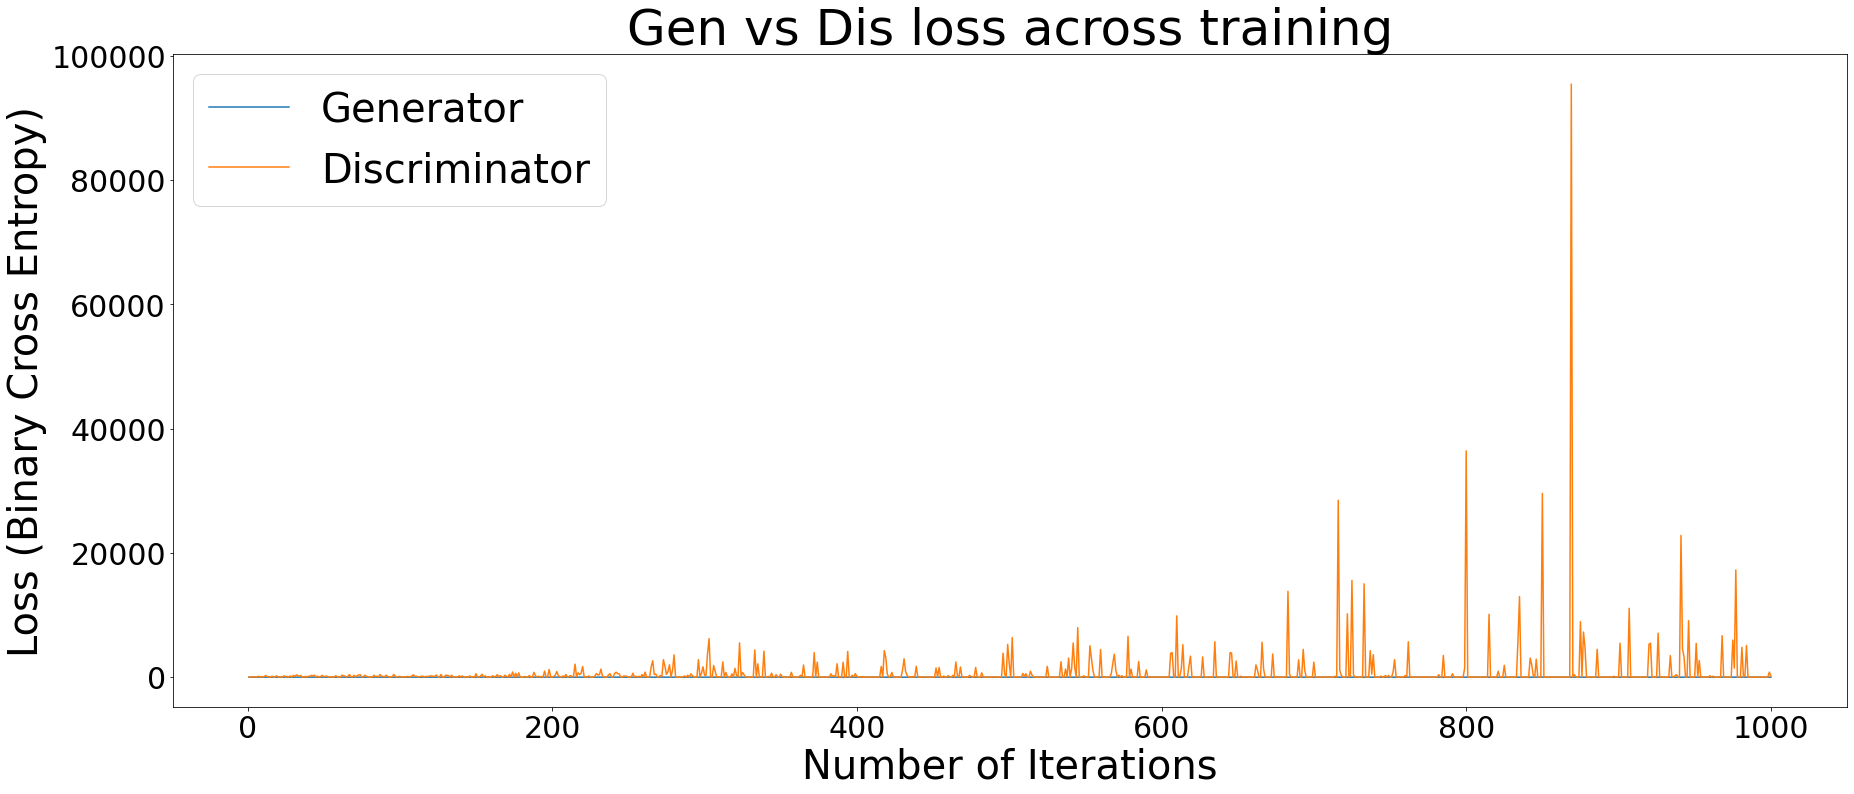

In [35]:
losses_g, losses_d = history[0], history[1]

fig, axes = plt.subplots(1,1, figsize=(30, 12))
ax1 = plt.subplot(1,1,1)

plt.plot(range(1,1001), losses_g, label = 'Generator')
plt.plot(range(1, 1001), losses_d, label = 'Discriminator')
#plt.plot(range(1,601), losses_g, label = 'Generator')
#plt.plot(range(1, 601), losses_d, label = 'Discriminator')

ax1.tick_params(labelsize = 30)
ax1.set_xlabel('Number of Iterations', fontsize = 40)
ax1.set_ylabel('Loss (Binary Cross Entropy)', fontsize = 40)
plt.title('Gen vs Dis loss across training', fontsize = 50)
plt.legend(fontsize = 40)

# Testing Generated Samples from Trained Generator

In [36]:
#df.label.value_counts()
print("df.columns:", df.columns)

df.columns: Index(['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
       'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER', 'GENDER_F',
       'GENDER_M'],
      dtype='object')


In [37]:
def generate_samples(number_of_samples_to_generate, class_val):
    if class_val == 0:
        label = torch.zeros(number_of_samples_to_generate, dtype=torch.int).to(device)  #generate for class 0
    elif class_val == 1:
        label = torch.ones(number_of_samples_to_generate, dtype=torch.int).to(device)  #generate for class 1
        
        
    latent_space_samples = torch.randn(number_of_samples_to_generate, n_features).to(device)
    generated_samples = generator(latent_space_samples, label)
    print('generated_samples: ', generated_samples.shape)
    print('label: ', label.shape)
    generated_samples = torch.concat([generated_samples, label.reshape(number_of_samples_to_generate, 1)], \
                                     dim = 1)
    generated_samples = generated_samples.cpu().detach().numpy()
    #check this line
    print(df.columns)
    df_generated = pd.DataFrame(generated_samples, columns = df.columns)  #assign columns
    print("df_generated_shape", df_generated.shape)
    #df_generated = pd.DataFrame(generated_samples)  # don't assign columns, leon
    return df_generated

In [38]:
#df_generated_0 = generate_samples(549, 0)
df_generated_0 = generate_samples(2000, 0)  #5000

df_generated_0["LUNG_CANCER"] = 0
df_generated_0.info()
df_generated_0.head()
print(df_generated_0.head())
#df_generated_1 = generate_samples(342, 1)
df_generated_1 = generate_samples(1800, 1)  #4800
df_generated_1["LUNG_CANCER"] = 1
print(df_generated_1.head())

generated_samples:  torch.Size([2000, 16])
label:  torch.Size([2000])
Index(['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
       'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER', 'GENDER_F',
       'GENDER_M'],
      dtype='object')
df_generated_shape (2000, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AGE                    2000 non-null   float32
 1   SMOKING                2000 non-null   float32
 2   YELLOW_FINGERS         2000 non-null   float32
 3   ANXIETY                2000 non-null   float32
 4   PEER_PRESSURE          2000 non-null   float32
 5   CHRONIC DISEASE        2000 non-null   float32
 6   FATIGUE                2000 non-null   float32
 7   ALLERGY  

Concatenate dataset

In [39]:
df_gan = pd.concat([df_generated_1, df_generated_0], ignore_index=True, sort=False)  #leon
df_gan = df_gan.sample(frac=1).reset_index(drop=True)  #用于从DataFrame中随机选择行和列。

y_train_gan = df_gan['LUNG_CANCER']
X_train_gan = df_gan.drop('LUNG_CANCER',axis='columns')
#print(X_train_2.iloc[0:5])pe
#y_train_gan = df_gan['LUNG_CANCER'].values
#y_train_gan = df_gan['LUNG_CANCER']
print("X:", X_train_gan.head())
print("Y：", y_train_gan.head())



#y_train_2_d = df_gan['LUNG_CANCER']

#transform to narray lost column name
X_train_gan = X_train_gan.values
y_train_gan = y_train_gan.values
#transforms to dataframe again
X_train_gan = pd.DataFrame(X_train_gan)
y_train_gan = pd.DataFrame(y_train_gan)

print(f"X_train_gan shape: {X_train_gan.shape}")
print(f"y_train_gan shape: {y_train_gan.shape}")

# transform and lost column name for concatenation
origin_df_x = pd.DataFrame(X_train.values)
origin_df_y = pd.DataFrame(y_train.values)


#X_train_2_e =  X_train_2.values

#origin_df - pd.merge(origin_df_x,origin_df_y)
#origin_df.info()
#origin_df.head()

#X_train_2_d = pd.DataFrame(X_train_2_e)

X_train_fin = pd.concat([origin_df_x, X_train_gan], axis=0, ignore_index=True)       
y_train_fin = pd.concat([origin_df_y, y_train_gan], axis=0, ignore_index=True)
print('X', X_train_fin.count())
print('y:',y_train_fin.count())
print('X', X_train_fin.shape)
print('y:',y_train_fin.shape)


#print("y count(）", y_train_fin.value_counts())
print(X_train_fin.head())
print(y_train_fin.head())

X:         AGE   SMOKING  YELLOW_FINGERS   ANXIETY  PEER_PRESSURE  \
0  0.421635  0.729027        0.760568  0.611937       0.847133   
1  0.965685  1.910970        2.231100  1.999675       1.836305   
2  0.626559  1.210906        1.072996  1.141008       1.088026   
3  0.618999  1.269639        1.202499  1.001550       1.185884   
4  0.819490  1.503342        1.458259  1.345540       1.316121   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0        -0.154936  0.682792 -0.041514  0.003310           0.019465  0.429938   
1        -0.729558  1.984937 -0.036096  0.830436           0.029971  2.460595   
2        -0.232935  1.078048  0.009205  0.695621          -0.085179  0.859832   
3        -0.603129  1.043351 -0.091086  0.011035          -0.136707  0.986151   
4        -0.310992  1.322787 -0.081474  0.817744          -0.026066  1.303655   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  GENDER_F  GENDER_M  
0             0.878389           

In [40]:
"""
import xgboost as xgb2
xgb2 = xgb2.XGBClassifier()
y_train_fin = y_train_fin.values.ravel()

xgb2.fit(X_train_fin,y_train_fin)

y_pred = xgb2.predict(X_test)

print(classification_report(y_test, y_pred))
print(classification_report_imbalanced(y_test, y_pred))
plot_confusion_matrix(xgb2, X_test, y_test)
plt.show()  
"""

'\nimport xgboost as xgb2\nxgb2 = xgb2.XGBClassifier()\ny_train_fin = y_train_fin.values.ravel()\n\nxgb2.fit(X_train_fin,y_train_fin)\n\ny_pred = xgb2.predict(X_test)\n\nprint(classification_report(y_test, y_pred))\nprint(classification_report_imbalanced(y_test, y_pred))\nplot_confusion_matrix(xgb2, X_test, y_test)\nplt.show()  \n'

In [41]:
parameter = {
    'max_depth':range(3,10,2), 
    'min_child_weight':range(1,5,2)
    }

p_grid_search = GridSearchCV(estimator = xgb.XGBClassifier(eval_metric='mlogloss'), param_grid = parameter, 
                             scoring='accuracy', n_jobs=-1, cv=2)

p_grid_search.fit(X_train_fin,y_train_fin)


GridSearchCV(cv=2,
             estimator=xgb.XGBClassifier(base_score=None, booster=None,   #leon  add xgb before xgbclassifier
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=None, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 5, 2)},
             scoring='accuracy')

p_grid_search.best_params_, p_grid_search.best_score_

({'max_depth': 3, 'min_child_weight': 1}, 0.9728260869565217)

In [42]:
refined_xgb_model = xgb.XGBClassifier(eval_metric='logloss', max_depth=list(p_grid_search.best_params_.values())[0]-1, 
                                      min_child_weight=list(p_grid_search.best_params_.values())[-1]+4)
refined_xgb_model.fit(X_train_fin,y_train_fin)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=2,
              max_leaves=0, min_child_weight=5, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

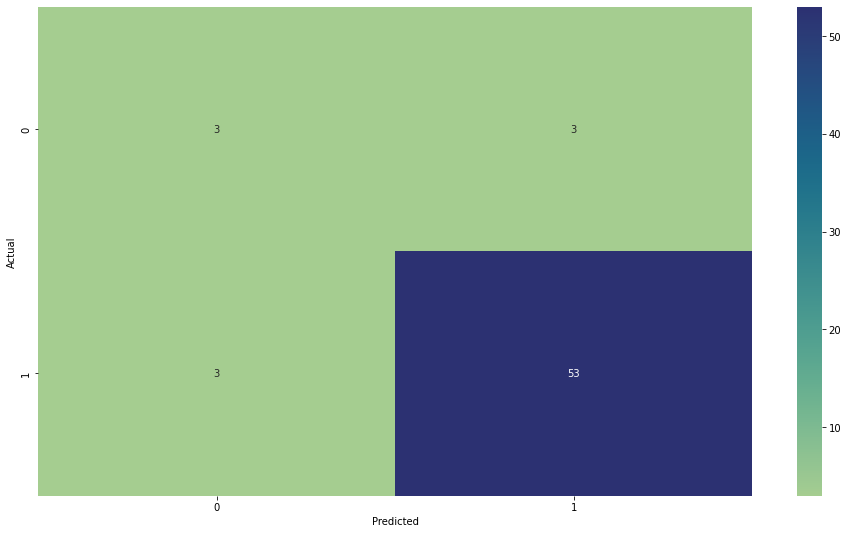

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         6
           1       0.95      0.95      0.95        56

    accuracy                           0.90        62
   macro avg       0.72      0.72      0.72        62
weighted avg       0.90      0.90      0.90        62

                   pre       rec       spe        f1       geo       iba       sup

          0       0.50      0.50      0.95      0.50      0.69      0.45         6
          1       0.95      0.95      0.50      0.95      0.69      0.49        56

avg / total       0.90      0.90      0.54      0.90      0.69      0.49        62



In [43]:
#from imblearn.metrics import classification_report_imbalanced
ref_xgb_pred_y2 = refined_xgb_model.predict(X_test)
def plot_confusion_matrix(y_test, y_pred, color):
    
    plt.rcParams['figure.figsize'] = (16, 9)
   
    data = {'y_Actual': y_test, 'y_Predicted': y_pred}

    df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
    conf_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], 
                              rownames=['Actual'], 
                              colnames=['Predicted'])
    
    sns.heatmap(conf_matrix, annot=True, fmt = "d", cmap=color)
    plt.show()
    
plot_confusion_matrix(np.array(y_test), ref_xgb_pred_y2, 'crest')
print(classification_report(y_test, ref_xgb_pred_y2))
print(classification_report_imbalanced(y_test, ref_xgb_pred_y2))  #, digits=4

In [44]:
"""
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300, n_jobs=-1)
rf.fit(X_train_fin,y_train_fin)
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))
plot_confusion_matrix(rf, X_test, y_test)
plt.show()
"""

'\nfrom sklearn.ensemble import RandomForestClassifier\nrf = RandomForestClassifier(n_estimators=300, n_jobs=-1)\nrf.fit(X_train_fin,y_train_fin)\ny_pred = rf.predict(X_test)\n\nprint(classification_report(y_test, y_pred))\nplot_confusion_matrix(rf, X_test, y_test)\nplt.show()\n'

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.67      0.33      0.44         6
           1       0.93      0.98      0.96        56

    accuracy                           0.92        62
   macro avg       0.80      0.66      0.70        62
weighted avg       0.91      0.92      0.91        62

                   pre       rec       spe        f1       geo       iba       sup

          0       0.67      0.33      0.98      0.44      0.57      0.31         6
          1       0.93      0.98      0.33      0.96      0.57      0.35        56

avg / total       0.91      0.92      0.40      0.91      0.57      0.34        62

[0 1]


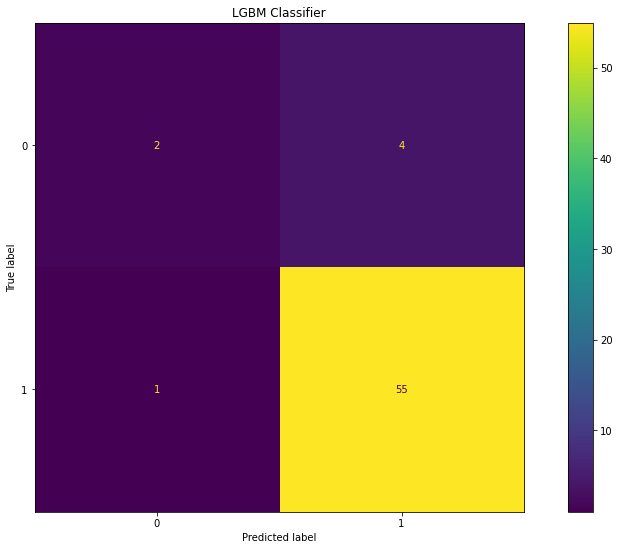

In [45]:
lgb_2 = lgb.LGBMClassifier()

#y_train_3 = y_train_3.values
#y_train_3 = y_train_3.ravel()
lgb_2.fit(X_train_fin,y_train_fin)

y_pred = lgb_2.predict(X_test)


print(classification_report(y_test, y_pred))
print(classification_report_imbalanced(y_test, y_pred))
"""
plot_confusion_matrix(lgb_2, X_test, y_test)
plt.show()
"""
print(lgb_2.classes_)

cm = confusion_matrix(y_test, y_pred, labels=lgb_2.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgb_2.classes_)
disp.plot()
_ = disp.ax_.set_title("LGBM Classifier")
plt.show()

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         6
           1       0.95      0.95      0.95        56

    accuracy                           0.90        62
   macro avg       0.72      0.72      0.72        62
weighted avg       0.90      0.90      0.90        62

                   pre       rec       spe        f1       geo       iba       sup

          0       0.50      0.50      0.95      0.50      0.69      0.45         6
          1       0.95      0.95      0.50      0.95      0.69      0.49        56

avg / total       0.90      0.90      0.54      0.90      0.69      0.49        62



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


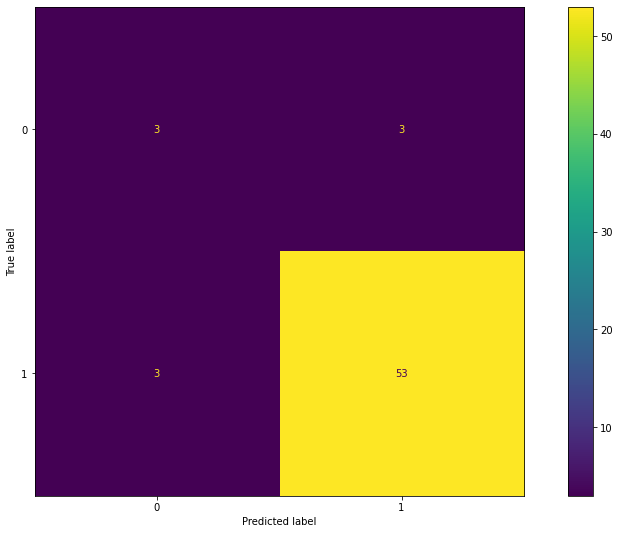

In [46]:
import xgboost as xgb
from sklearn.metrics import classification_report,\
                            plot_confusion_matrix, confusion_matrix
xgb_3=xgb.XGBClassifier()

xgb_3.fit(X_train_fin,y_train_fin)

y_pred = xgb_3.predict(X_test)
#from sklearn.preprocessing import LabelEncoder
#change y value to 0..2
#le2 = LabelEncoder()
#y_test = le2.fit_transform(y_test)

print(classification_report(y_test, y_pred))
print(classification_report_imbalanced(y_test, y_pred))
plot_confusion_matrix(xgb_3, X_test, y_test)
plt.show()

# Checking distributions of synthetic data

In [47]:
"""
import warnings
warnings.filterwarnings("ignore")
"""

'\nimport warnings\nwarnings.filterwarnings("ignore")\n'

In [48]:

"""
df0 = df[df.LUNG_CANCER == 0]
#df1 = df[df.label == 1]
df1 = df[df.LUNG_CANCER == 1]

mc = MinMaxScaler(feature_range=(0, 1))
standard_scaler0 = mc.fit(df0)
df0 = standard_scaler0.transform(df0)
#x_scaled = pd.DataFrame(df0)

standard_scaler1 = mc.fit(df1)
df1 = standard_scaler1.transform(df1)

print(df0[0:5])
print(df1[0:5])
"""

'\ndf0 = df[df.LUNG_CANCER == 0]\n#df1 = df[df.label == 1]\ndf1 = df[df.LUNG_CANCER == 1]\n\nmc = MinMaxScaler(feature_range=(0, 1))\nstandard_scaler0 = mc.fit(df0)\ndf0 = standard_scaler0.transform(df0)\n#x_scaled = pd.DataFrame(df0)\n\nstandard_scaler1 = mc.fit(df1)\ndf1 = standard_scaler1.transform(df1)\n\nprint(df0[0:5])\nprint(df1[0:5])\n'

<b> For class 0

In [49]:
"""
print('FOR CLASS 0')
fig, axes = plt.subplots(16, 1, figsize=(10, 50))  # must change plot number

for n, col in enumerate(df.columns.to_list()[:-1]):
    ax1 = plt.subplot(16,1, n+1)  # must change plot number
    sns.distplot(x = df_generated_0[col], color = 'red', label = 'Generated')
    sns.distplot(x = df0[col], color = 'blue', label = 'real')
    plt.legend(fontsize = 12)  # 30
    plt.xlabel(col, fontsize = 12)  #30 
    plt.title(col, fontsize = 12)   #30
    plt.ylabel(' ')
plt.subplots_adjust(wspace=0.5,hspace=0.5)
"""

"\nprint('FOR CLASS 0')\nfig, axes = plt.subplots(16, 1, figsize=(10, 50))  # must change plot number\n\nfor n, col in enumerate(df.columns.to_list()[:-1]):\n    ax1 = plt.subplot(16,1, n+1)  # must change plot number\n    sns.distplot(x = df_generated_0[col], color = 'red', label = 'Generated')\n    sns.distplot(x = df0[col], color = 'blue', label = 'real')\n    plt.legend(fontsize = 12)  # 30\n    plt.xlabel(col, fontsize = 12)  #30 \n    plt.title(col, fontsize = 12)   #30\n    plt.ylabel(' ')\nplt.subplots_adjust(wspace=0.5,hspace=0.5)\n"

<b> For class 1

In [50]:
"""
print('FOR CLASS 1')
fig, axes = plt.subplots(16, 1, figsize=(10, 50)) #must change font size 

for n, col in enumerate(df.columns.to_list()[:-1]):
    ax1 = plt.subplot(16,1, n+1)
    sns.distplot(x = df_generated_1[col], color = 'red', label = 'Generated')
    sns.distplot(x = df1[col], color = 'blue', label = 'real')
    plt.legend(fontsize = 12) # #30
    plt.xlabel(col, fontsize = 12)
    plt.title(col, fontsize = 12)
    plt.ylabel(' ')
plt.subplots_adjust(wspace=0.5,hspace=0.5)
"""

"\nprint('FOR CLASS 1')\nfig, axes = plt.subplots(16, 1, figsize=(10, 50)) #must change font size \n\nfor n, col in enumerate(df.columns.to_list()[:-1]):\n    ax1 = plt.subplot(16,1, n+1)\n    sns.distplot(x = df_generated_1[col], color = 'red', label = 'Generated')\n    sns.distplot(x = df1[col], color = 'blue', label = 'real')\n    plt.legend(fontsize = 12) # #30\n    plt.xlabel(col, fontsize = 12)\n    plt.title(col, fontsize = 12)\n    plt.ylabel(' ')\nplt.subplots_adjust(wspace=0.5,hspace=0.5)\n"

Asssessment